Evaluate the cluster names by comparing ideas embeddings and their corresponding cluster names embeddings

In [1]:
# pylint: disable=unused-variable
# pylint: enable=too-many-lines
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import numpy as np
from scipy.spatial import distance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

MODEL_NAME = "intfloat/multilingual-e5-large-instruct"

In [2]:
ds = load_dataset("perspectiva-solution/embeddings-gdn-question-163")['train']
model = SentenceTransformer(MODEL_NAME)

In [3]:
df = ds.to_pandas()
df = df[df.cluster_id != -1]

In [4]:
cluster_titles = np.unique(df.cluster_title.to_numpy())
titles_embeddings = model.encode(cluster_titles)
title_embedding_mapping = dict(zip(cluster_titles, titles_embeddings))

In [5]:
results = []
for title, embedding in title_embedding_mapping.items():
    cluster_df = df[df.cluster_title == title]
    for idx, row in cluster_df.iterrows():
        similarity = 1 - distance.cosine(embedding, row.embeddings_1024)
        results.append({"cluster_title": title, "idea": row.text, "similarity": similarity})
    
sim_df = pd.DataFrame(results)

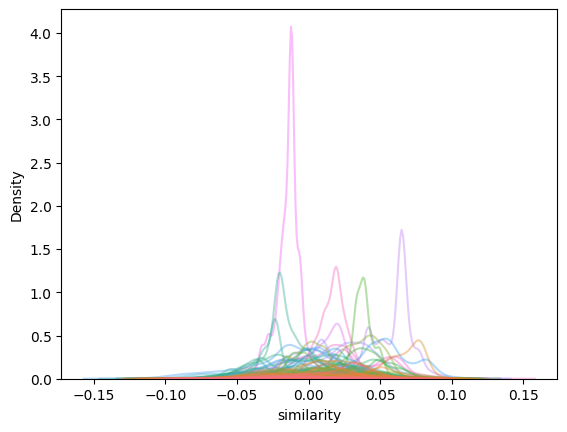

In [6]:
sns.kdeplot(
    sim_df,
    x="similarity",
    hue="cluster_title",
    legend=False,
    alpha=0.4
)
plt.show()

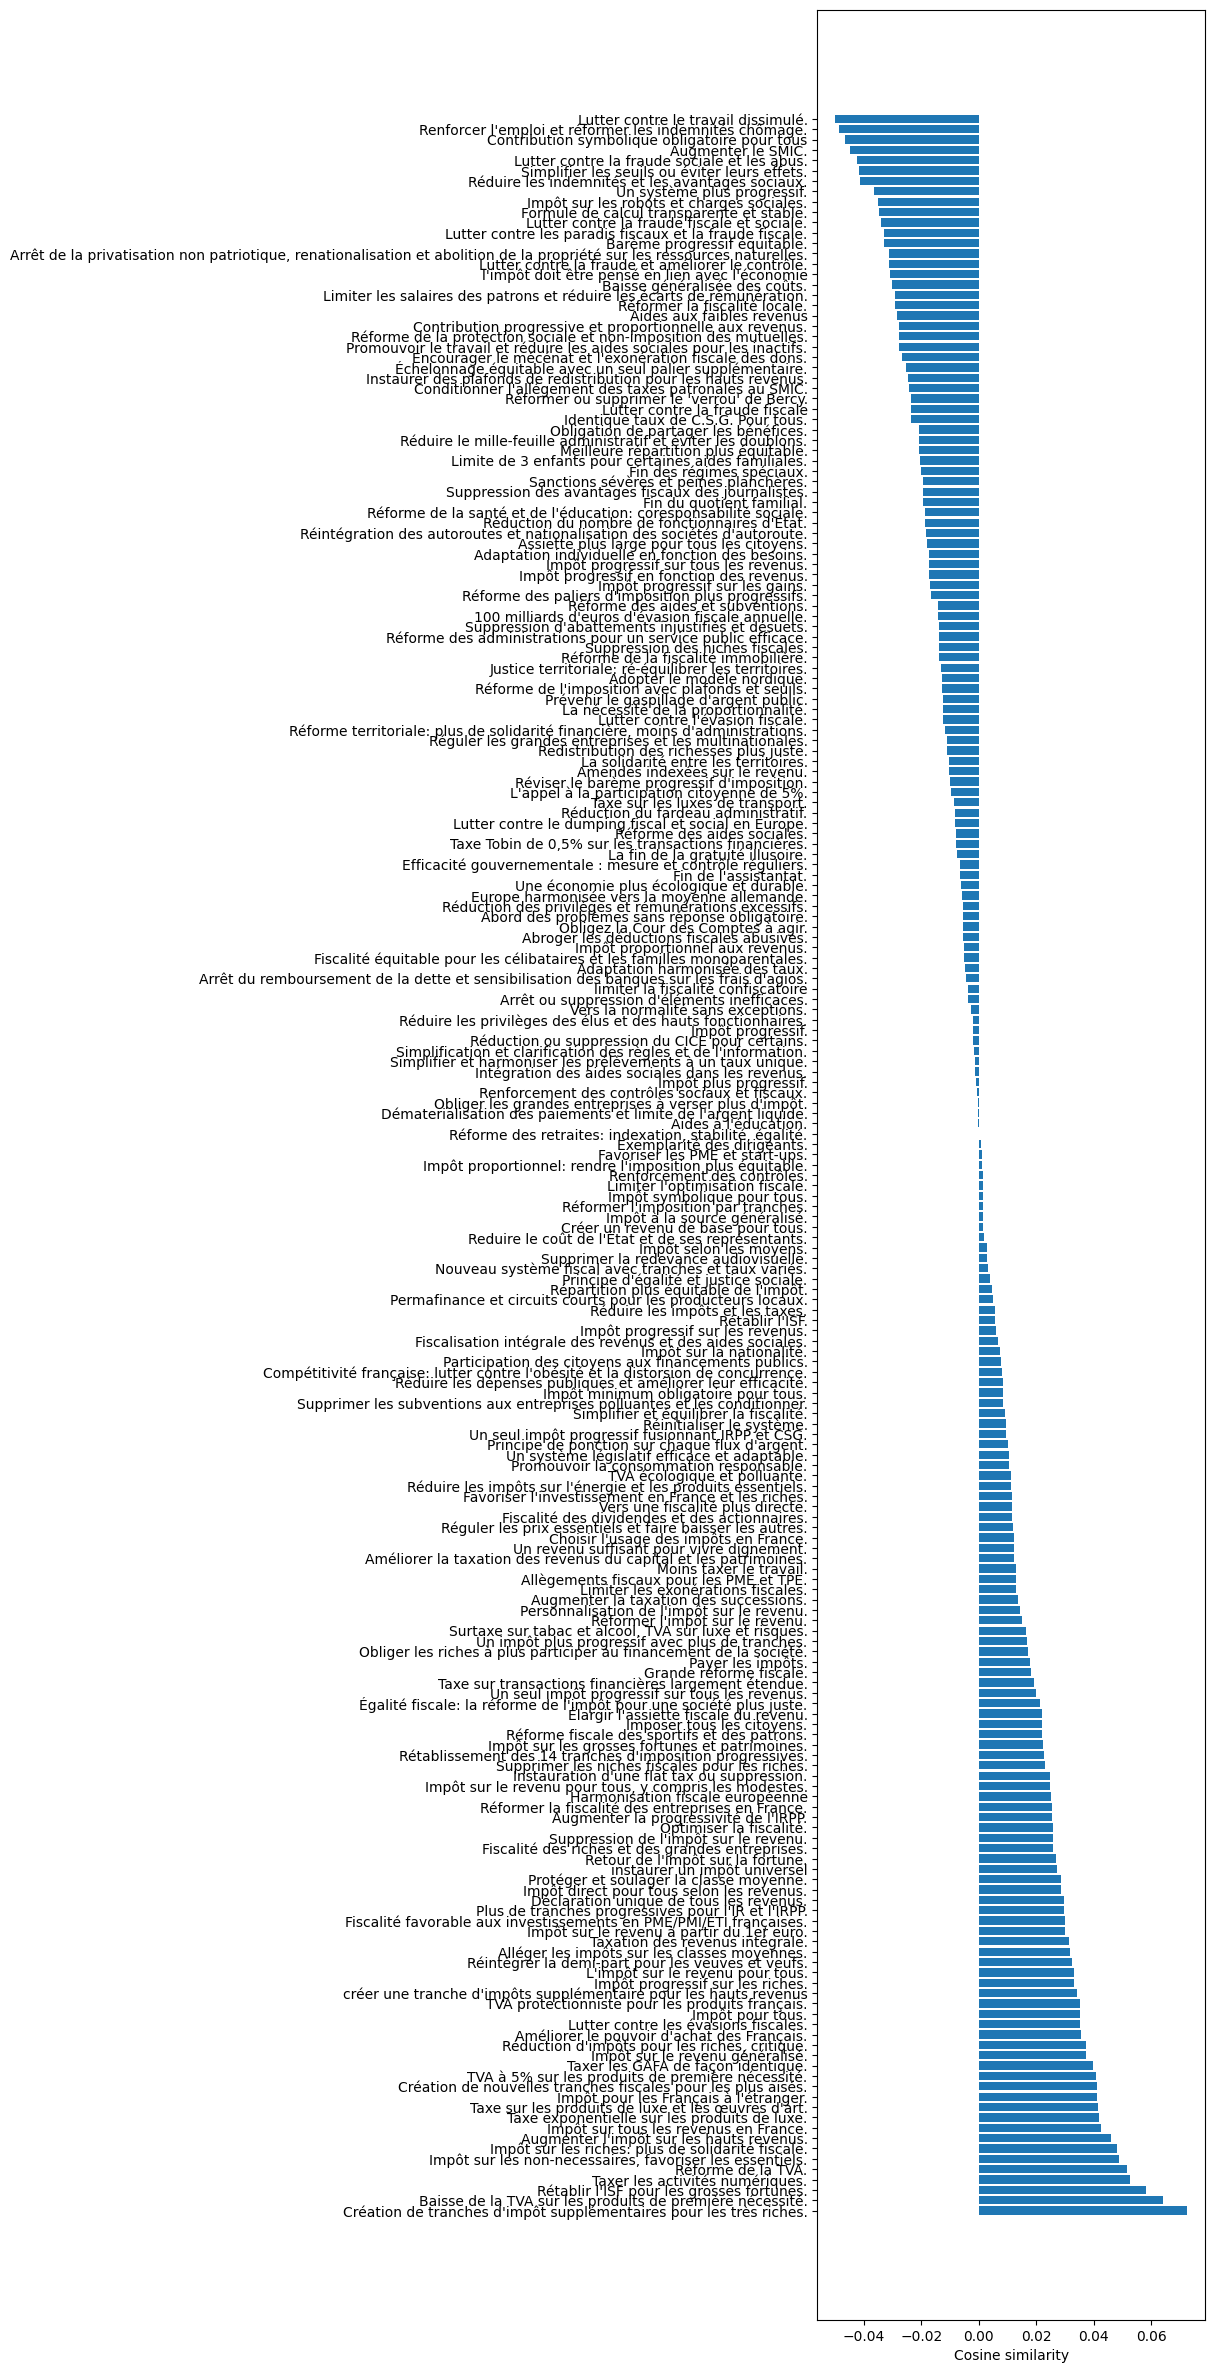

In [7]:
mean_quality = pd.DataFrame(sim_df.groupby("cluster_title")["similarity"].mean().sort_values(ascending=False))

plt.subplots(figsize=(5, 30))
plt.barh(mean_quality.index, width=mean_quality.similarity)
plt.xlabel("Cosine similarity")
plt.show()

In [8]:
sim_df[sim_df.cluster_title == mean_quality.iloc[-10].name].sort_values(by="similarity")

,cluster_title,idea,similarity
18615,Formule de calcul transparente et stable.,calcul inique,-0.092183
18655,Formule de calcul transparente et stable.,fonction mathématique,-0.091358
18663,Formule de calcul transparente et stable.,fonctions mathématiques,-0.085029
18662,Formule de calcul transparente et stable.,calcul sous forme de fonction,-0.082779
18688,Formule de calcul transparente et stable.,calculs complexes,-0.082672
...,...,...,...
18645,Formule de calcul transparente et stable.,calculs annuels invraisemblables,0.011315
18612,Formule de calcul transparente et stable.,simplifier le calcul,0.011373
18642,Formule de calcul transparente et stable.,simplifier les calculs,0.015511
18614,Formule de calcul transparente et stable.,simplifier les calculs,0.015511


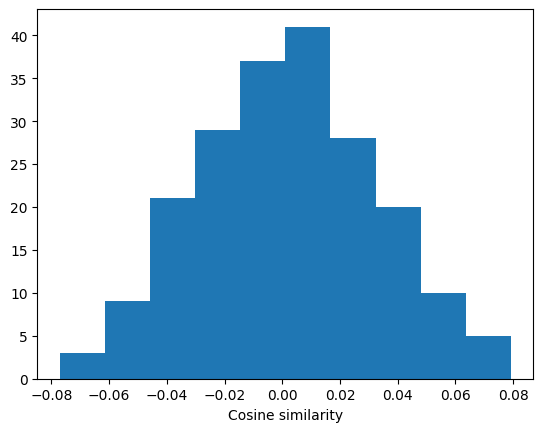

In [10]:
# Check out similarity between mean of ideas and title for each cluster
mean_embeddings = df.groupby("cluster_title")["embeddings_1024"].mean()
similarities = []
for title, vec in mean_embeddings.items():
    title_embedding = title_embedding_mapping[title]
    similarities.append(1 - distance.cosine(title_embedding, vec))

plt.hist(similarities)
plt.xlabel("Cosine similarity")
plt.show()